In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
data = pd.read_csv("fake_bills.csv", sep=";").drop("margin_low", axis=1)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_up     1500 non-null   float64
 5   length        1500 non-null   float64
dtypes: bool(1), float64(5)
memory usage: 60.2 KB
None


In [5]:
data["is_genuine"] = data["is_genuine"].apply(lambda x: 1 if x==True else 0)

In [6]:
Y = data["is_genuine"]
X = data.drop("is_genuine", axis=1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [11]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [13]:
out = log.predict(X_test)
print("Testing accuracy = ", accuracy_score(y_test, out)*100, "%")

Testing accuracy =  97.86666666666667 %


In [16]:
print(confusion_matrix(y_test, out))

[[106   7]
 [  1 261]]


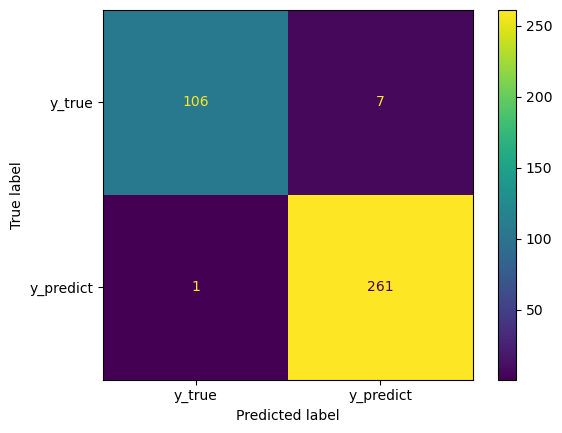

In [19]:
cm = confusion_matrix(y_test, out)
cmd = ConfusionMatrixDisplay(cm, display_labels=['y_true','y_predict'])
cmd.plot()